# 📘 Project Title: Apple Stock Analysis

This is my first Python data analysis project. I used historical stock data from Yahoo Finance for Apple Inc. (AAPL) to explore trends, calculate daily returns, and visualize stock performance over time using `yfinance`, `pandas`, and `matplotlib`.

In [1]:
import yfinance as yf
import pandas as pd

In [3]:
# Create a Ticker object for Apple Inc. using its stock symbol "AAPL"
apple = yf.Ticker("AAPL")

In [7]:
# Downloading Apple's stock data JSON file using Python's urllib library (works on Windows)
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
urllib.request.urlretrieve(url, "apple.json")


('apple.json', <http.client.HTTPMessage at 0x26dd29f0ce0>)

In [9]:
import json

# Open and read the 'apple.json' file
with open('apple.json') as json_file:
    # Load JSON data from the file into a Python dictionary
    apple_info = json.load(json_file)

# Display the loaded data
apple_info


{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [ ]:
# Retrieve the full historical stock price data for Apple
apple_share_price_data = apple.history(period="max")


In [22]:
# Check for missing values in the dataset
print(apple_share_price_data.isnull().sum())


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [12]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091310,0.091738,0.091310,0.091310,73449600,0.0,0.0


In [13]:
# Reset the index of the DataFrame to make 'Date' a regular column instead of the index
apple_share_price_data.reset_index(inplace=True)


In [24]:
# Get summary statistics of the dataset
print(apple_share_price_data.describe())

               Open          High           Low         Close        Volume  \
count  11241.000000  11241.000000  11241.000000  11241.000000  1.124100e+04   
mean      25.731231     26.013157     25.466472     25.752633  3.123582e+08   
std       53.537617     54.124941     53.001065     53.593868  3.340572e+08   
min        0.038153      0.038153      0.037724      0.037724  0.000000e+00   
25%        0.244492      0.250028      0.239494      0.244660  1.087321e+08   
50%        0.460580      0.467794      0.453742      0.461182  2.007656e+08   
75%       20.247507     20.370670     20.006946     20.218800  3.919216e+08   
max      257.568678    259.474086    257.010028    258.396667  7.421641e+09   

          Dividends  Stock Splits  
count  11241.000000  11241.000000  
mean       0.000826      0.001512  
std        0.012558      0.082754  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  


<Axes: title={'center': 'Apple Stock Opening Prices Over Time'}, xlabel='Date'>

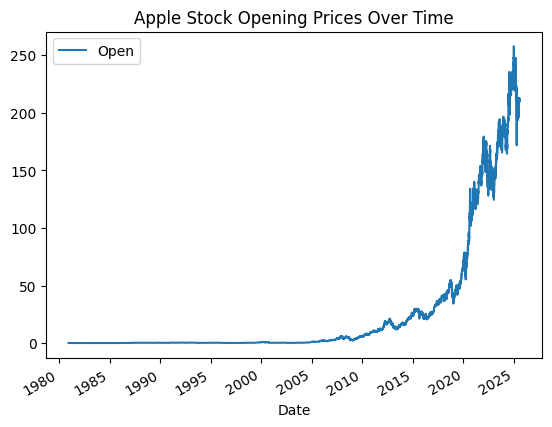

In [26]:
# Plot the opening stock prices over time using the 'Date' column on the x-axis
apple_share_price_data.plot(x="Date", y="Open",title="Apple Stock Opening Prices Over Time")


<Axes: title={'center': 'Apple Stock Closing Price Over Time'}, xlabel='Date'>

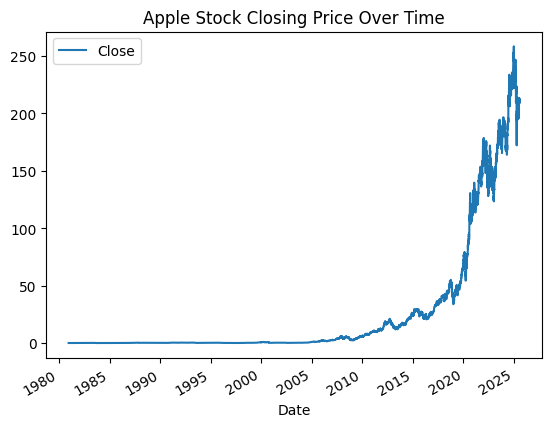

In [25]:
# Plot the closing price over time
apple_share_price_data.plot(x='Date', y='Close', title='Apple Stock Closing Price Over Time')


In [17]:
# Access and display the dividend history for Apple stock
apple.dividends


Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-05-10 00:00:00-04:00    0.250000
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
2025-05-12 00:00:00-04:00    0.260000
Name: Dividends, Length: 87, dtype: float64

<Axes: title={'center': 'Apple Dividend History Over Time'}, xlabel='Date'>

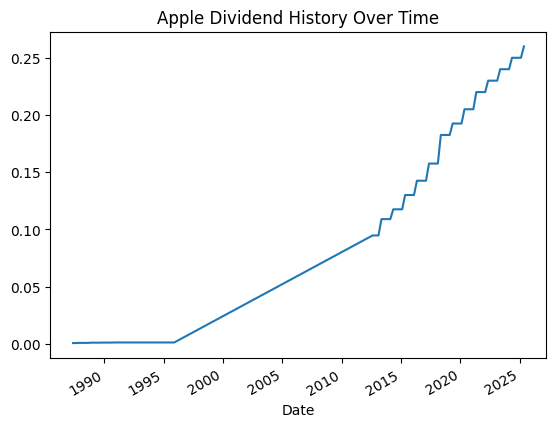

In [19]:
# Plot the dividend history for Apple stock
apple.dividends.plot(title="Apple Dividend History Over Time")


<Axes: title={'center': 'Apple Stock Trading Volume Over Time'}, xlabel='Date'>

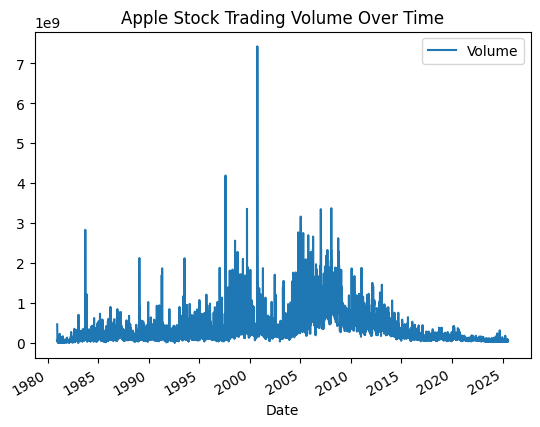

In [ ]:
# Plot the trading volume over time
apple_share_price_data.plot(x='Date', y='Volume', title='Apple Stock Trading Volume Over Time')

In [28]:
# Calculate 20-day Simple Moving Average (SMA) and add as a new column
apple_share_price_data['SMA_20'] = apple_share_price_data['Close'].rolling(window=20).mean()

<Axes: title={'center': 'Apple Close Price & 20-day SMA'}, xlabel='Date'>

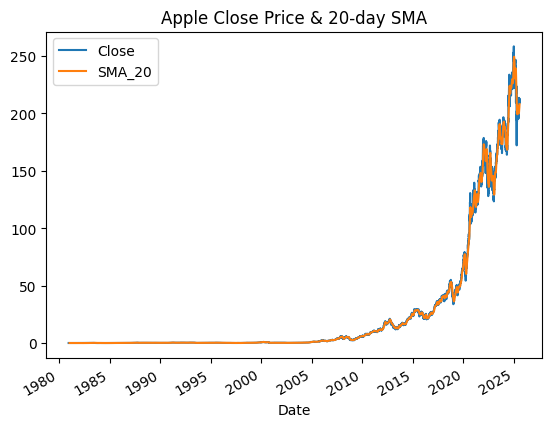

In [29]:
# Plot Close price with 20-day SMA
apple_share_price_data.plot(x='Date', y=['Close', 'SMA_20'], title='Apple Close Price & 20-day SMA')


In [30]:
# Calculate daily returns (percentage change) and add as a new column
apple_share_price_data['Daily_Return'] = apple_share_price_data['Close'].pct_change()

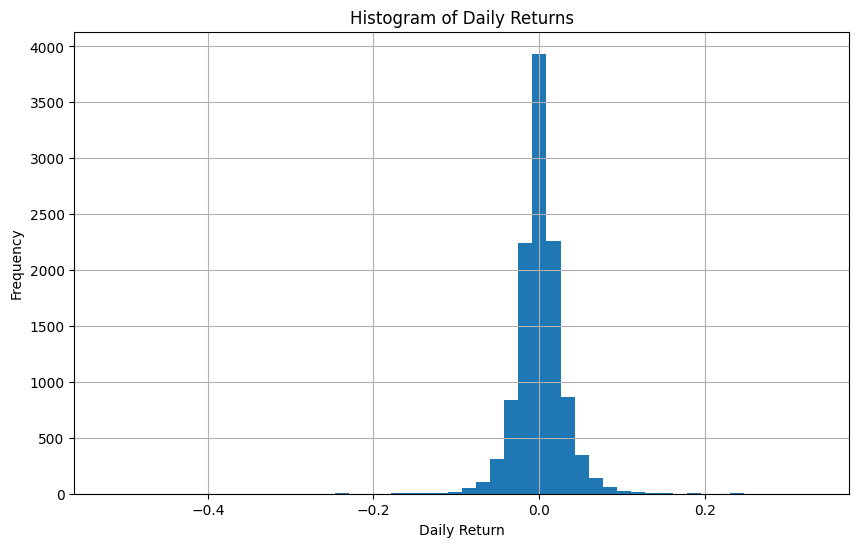

In [32]:
import matplotlib.pyplot as plt

# Plot histogram of daily returns to understand distribution
apple_share_price_data['Daily_Return'].hist(bins=50, figsize=(10,6))
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

In [37]:
# Calculate 20-day and 50-day moving averages for the 'Close' price
apple_share_price_data['MA20'] = apple_share_price_data['Close'].rolling(window=20).mean()
apple_share_price_data['MA50'] = apple_share_price_data['Close'].rolling(window=50).mean()

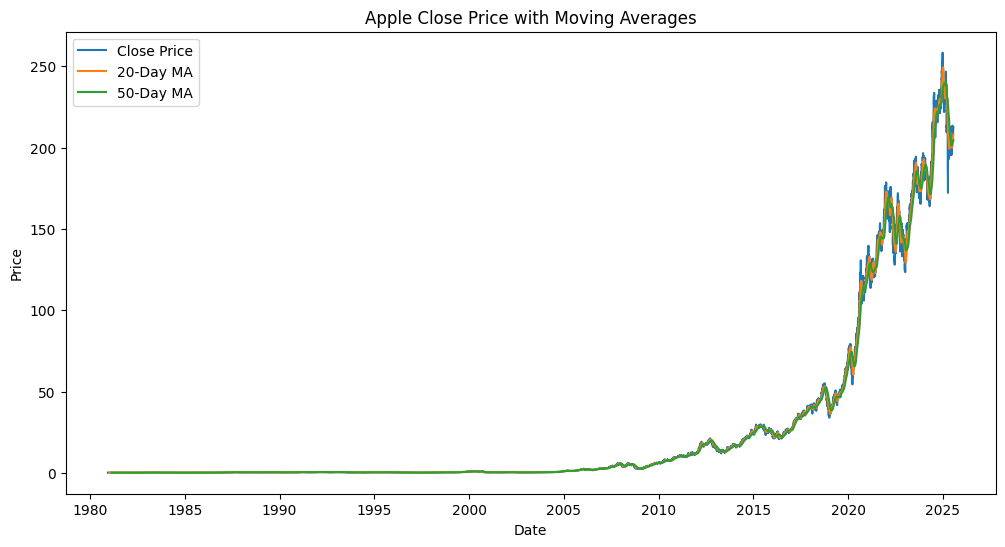

In [38]:
# Plot closing price with moving averages
plt.figure(figsize=(12,6))
plt.plot(apple_share_price_data['Date'], apple_share_price_data['Close'], label='Close Price')
plt.plot(apple_share_price_data['Date'], apple_share_price_data['MA20'], label='20-Day MA')
plt.plot(apple_share_price_data['Date'], apple_share_price_data['MA50'], label='50-Day MA')
plt.title('Apple Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [39]:
# Calculate rolling 20-day volatility (standard deviation of daily returns)
apple_share_price_data['Volatility_20d'] = apple_share_price_data['Daily_Return'].rolling(window=20).std()

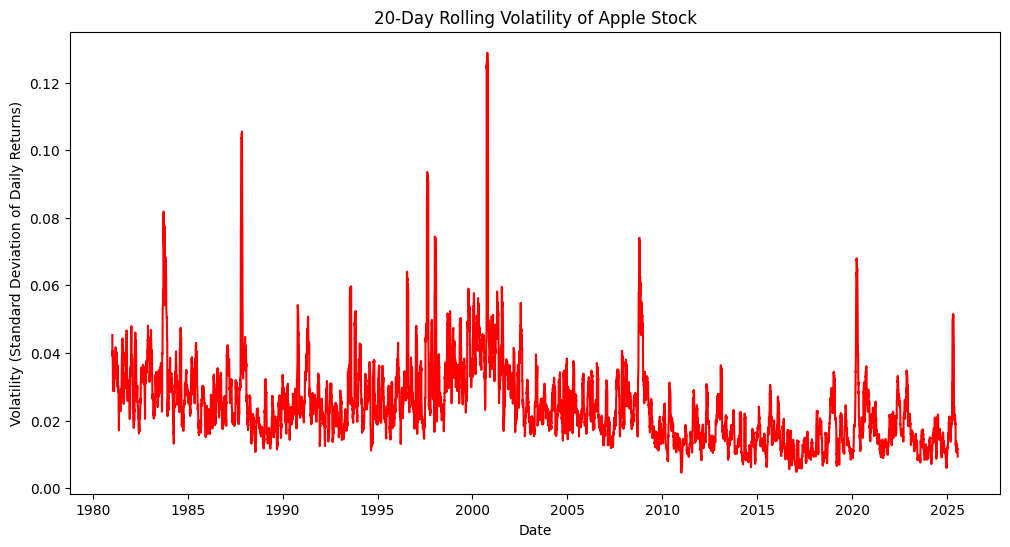

In [40]:
# Plot the 20-day rolling volatility
plt.figure(figsize=(12,6))
plt.plot(apple_share_price_data['Date'], apple_share_price_data['Volatility_20d'], color='red')
plt.title('20-Day Rolling Volatility of Apple Stock')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.show()